### Looking at the night sky, despite of light pollution, I know there are several white spots floating at the dark sky. What is more interesting is, not all are stars but others like quasars, or a galaxy, a whole new world out there. I want to know the difference between those three class. Will be there a such pattern, or combinations that makes the stars be classified as that? In my naked eye, I can’t easily differentiate them. With an online source dataset, with several features containing such different values and having the right accurate information, I could differentiate whether which among the three is.  

### https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey:



### This dataset consists of 10,000 records of observations of astronomical objects taken by the Sloan Digital Sky Survey. Every observation is described by 17 feature columns and 1 target column which identifies the observation to be a star, a galaxy or a quasar. The features are collected by using special type of telescopes, settings used to properly detect the objects, and the position of earth relative the sun with March equinox as the origin. The dataset offers plenty of information about space to explore. I target to have a pattern that can distinguish if it is a star or not.


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
a = pd.read_csv('Skyserver.csv')

In [75]:
a.info()
#already cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [76]:
a.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [22]:
a.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,field,specobjid,class,redshift,plate,mjd,fiberid,galaxy,quasar,star
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,...,161,5.033450e+17,GALAXY,0.027583,447,51877,246,1,0,0
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,...,162,5.033400e+17,GALAXY,0.117772,447,51877,228,1,0,0
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,...,162,8.222620e+18,STAR,-0.000402,7303,57013,622,0,0,1
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,...,163,5.033400e+17,GALAXY,0.014019,447,51877,229,1,0,0
9999,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,...,163,5.033410e+17,GALAXY,0.118417,447,51877,233,1,0,0


In [23]:
a.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,galaxy,quasar,star
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400,0.499800,0.085000,0.415200
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149,0.500025,0.278896,0.492781
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000,0.000000,0.000000,0.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000,0.000000,0.000000,0.000000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000,0.000000,0.000000,0.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000,1.000000,0.000000,1.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000,1.000000,1.000000,1.000000


In [24]:
mask = a.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
objid,0,0.0
field,0,0.0
quasar,0,0.0
galaxy,0,0.0
fiberid,0,0.0
mjd,0,0.0
plate,0,0.0
redshift,0,0.0
class,0,0.0
specobjid,0,0.0


In [77]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown="ignore")

X = ohe.fit_transform(a["class"].values.reshape(-1,1)).toarray()

In [78]:
a_galaxy = []
a_quasar = []
a_star = []
for i in range(len(a)):
    a_star.append(int(X[i][2]))
    a_quasar.append(int(X[i][1]))
    a_galaxy.append(int(X[i][0]))
    
a["galaxy"] = a_galaxy
a["quasar"] = a_quasar
a["star"] = a_star

In [28]:
a["star"]

0       1
1       1
2       0
3       1
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    0
Name: star, Length: 10000, dtype: int64

In [356]:
a[:18]

,objid,ra,dec,u,g,r,i,z,run,rerun,...,field,specobjid,cls,redshift,plate,mjd,fiberid,galaxy,quasar,star
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,...,267,3.720000e+18,STAR,-0.000009,3306,54922,491,0,0,1
1,1.240000e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,...,267,3.640000e+17,STAR,-0.000055,323,51615,541,0,0,1
2,1.240000e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,...,268,3.230000e+17,GALAXY,0.123111,287,52023,513,1,0,0
3,1.240000e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,...,269,3.720000e+18,STAR,-0.000111,3306,54922,510,0,0,1
4,1.240000e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,...,269,3.720000e+18,STAR,0.000590,3306,54922,512,0,0,1
5,1.240000e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,...,269,3.650000e+17,STAR,0.000315,324,51666,594,0,0,1
6,1.240000e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,...,269,3.230000e+17,GALAXY,0.100242,287,52023,559,1,0,0
7,1.240000e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,...,269,3.720000e+18,STAR,0.000315,3306,54922,515,0,0,1
8,1.240000e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,...,270,3.640000e+17,STAR,0.000089,323,51615,595,0,0,1
9,1.240000e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,...,270,3.240000e+17,GALAXY,0.040508,288,52000,400,1,0,0


In [79]:
a = a.drop("class",axis=1)

In [30]:
a

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,galaxy,quasar,star
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491,0,0,1
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541,0,0,1
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513,1,0,0
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510,0,0,1
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0.027583,447,51877,246,1,0,0
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0.117772,447,51877,228,1,0,0
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,-0.000402,7303,57013,622,0,0,1
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0.014019,447,51877,229,1,0,0


In [80]:
a.to_csv("a_cleaned.csv")

In [81]:
#Decision Tree   Naive Bayes Classifier    K-Nearest Neighbors
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.naive_bayes import GaussianNB as nb
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [82]:
d = pd.read_csv("a_cleaned.csv")

In [34]:
cols = list(d.columns)
for i in range(len(cols)):
    print(i, cols[i])

0 Unnamed: 0
1 objid
2 ra
3 dec
4 u
5 g
6 r
7 i
8 z
9 run
10 rerun
11 camcol
12 field
13 specobjid
14 redshift
15 plate
16 mjd
17 fiberid
18 galaxy
19 quasar
20 star


In [35]:
cols.pop(-1);cols.pop(-1); cols.pop(-1); cols.pop(0); 
print(cols)

['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid']


In [84]:
d = d[:8500]
X = d[cols]
y = d["star"]
print(X.shape, "  ", y.shape)

(8500, 17)    (8500,)


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=(1/8.5), random_state=0)

In [86]:
X_train

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
4017,1.237650e+18,160.345176,1.206731,19.52401,17.63925,16.67413,16.23925,15.91153,756,301,6,297,5.697770e+17,0.100669,506,52022,260
7974,1.237650e+18,173.863754,-0.030815,16.53628,15.56366,15.24758,15.12318,15.09078,756,301,3,388,3.222370e+18,-0.000020,2862,54471,166
2537,1.237650e+18,170.896664,-1.565652,16.09008,14.91449,14.32554,13.91501,13.64964,1231,301,6,11,3.671350e+17,0.044631,326,52375,332
98,1.237650e+18,161.173682,-0.503545,18.95158,17.47266,16.70008,16.29777,15.99012,756,301,2,303,3.096970e+17,0.116126,275,51910,270
6891,1.237650e+18,161.080928,0.677356,19.25705,18.20449,17.67189,17.25336,17.07440,756,301,5,302,3.086700e+17,0.064820,274,51913,630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,1.237650e+18,126.276962,47.852258,18.48431,17.54042,17.18689,17.05280,16.99716,1345,301,3,128,4.161450e+18,0.000146,3696,55277,444
7891,1.237650e+18,187.592745,-1.153358,19.38898,17.97082,17.23584,16.87221,16.57838,752,301,1,294,3.253880e+17,0.092100,289,51990,11
4859,1.237650e+18,179.163249,-0.526699,19.04383,17.57419,16.70666,16.25977,15.88763,756,301,2,423,3.197670e+17,0.125285,284,51943,40
3264,1.237650e+18,133.253542,0.565068,18.83673,17.90111,17.59255,17.46506,17.45412,1239,301,5,86,4.295460e+18,0.000641,3815,55537,568


In [39]:
X_val

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
8101,1.237650e+18,163.023290,0.289939,19.47384,17.83879,16.97902,16.49217,16.09986,756,301,4,315,3.108770e+17,0.037877,276,51909,468
5597,1.237650e+18,144.004868,59.191603,19.22058,18.93541,18.68871,18.73598,18.65442,1345,301,5,231,5.090520e+17,0.958035,452,51911,528
394,1.237650e+18,162.448699,-0.594964,16.73909,15.50358,15.00279,14.81130,14.73810,756,301,2,311,2.881210e+18,0.000989,2559,54208,105
234,1.237650e+18,174.164488,-0.956707,19.57255,18.59834,18.47911,18.45792,18.60459,745,301,1,103,3.175300e+17,0.001135,282,51658,94
4209,1.237650e+18,154.082419,0.651909,18.04709,16.35452,15.58110,15.18233,14.88503,756,301,5,255,3.052340e+17,0.079281,271,51883,420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5892,1.237650e+18,180.330546,-0.490310,17.81283,16.85153,16.50748,16.37648,16.32963,756,301,2,431,3.256170e+18,0.000532,2892,54552,230
462,1.237650e+18,162.886970,-1.002881,17.79835,16.35954,15.67576,15.28575,14.98440,756,301,1,314,3.108160e+17,0.037305,276,51909,245
834,1.237650e+18,163.658969,-0.571430,19.21734,18.27869,17.56783,17.18556,16.99607,756,301,2,319,3.107810e+17,0.193781,276,51909,119
5306,1.237650e+18,233.790457,-0.663892,18.06377,16.06067,15.02047,14.51427,14.10523,752,301,2,603,4.087190e+17,0.066215,363,51989,62


### finding the combination for K-Neighbors

In [87]:
model = kn()
params = {'n_neighbors':[3,5,7,9,12,13],'weights':['uniform', 'distance'],'leaf_size':[20,30,40,50], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'] }

clf = GridSearchCV(
    estimator=model, 
    param_grid=params, 
    cv=10,  # 10-fold cross validation
    n_jobs=-1  # run in parallel
)
clf.fit(X_train, y_train)

v_results = pd.DataFrame(clf.cv_results_)
print(v_results.shape)

(192, 22)


In [88]:
v_results = v_results.sort_values(by=['mean_test_score'],ascending=False)
v_results[:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
176,0.012965,0.005027,0.435788,0.038554,brute,40,12,uniform,"{'algorithm': 'brute', 'leaf_size': 40, 'n_nei...",0.889333,...,0.833333,0.874667,0.890667,0.869333,0.873333,0.872,0.868,0.8704,0.014905,1
44,0.011170,0.003617,0.410878,0.011293,auto,50,12,uniform,"{'algorithm': 'auto', 'leaf_size': 50, 'n_neig...",0.889333,...,0.833333,0.874667,0.890667,0.869333,0.873333,0.872,0.868,0.8704,0.014905,1
32,0.011121,0.003323,0.364725,0.024683,auto,40,12,uniform,"{'algorithm': 'auto', 'leaf_size': 40, 'n_neig...",0.889333,...,0.833333,0.874667,0.890667,0.869333,0.873333,0.872,0.868,0.8704,0.014905,1


In [89]:
#kn_params = { "algorithm":v_results["param_algorithm"][v_results.index[0]], "leaf_size":v_results["param_leaf_size"][v_results.index[0]], "n_neighbors":v_results["param_n_neighbors"][v_results.index[0]], "weights":v_results["param_weights"][v_results.index[0]]}
kn_ = kn(algorithm=v_results["param_algorithm"][v_results.index[0]], leaf_size=v_results["param_leaf_size"][v_results.index[0]], n_neighbors=v_results["param_n_neighbors"][v_results.index[0]], weights=v_results["param_weights"][v_results.index[0]])
kn_model = kn_.fit(X_train, y_train)
output_kn = kn_.predict(X_val)


### finding the combination for Naive_Bayes Gaussian

In [90]:
model = nb()
params = {'var_smoothing': np.logspace(0,-9, num=100)}

clf = GridSearchCV(
    estimator=model, 
    param_grid=params, 
    cv=10,  # 10-fold cross validation
    n_jobs=-1  # run in parallel
)
clf.fit(X_train, y_train)

v_results = pd.DataFrame(clf.cv_results_)
print(v_results.shape)

(100, 19)


In [63]:
v_results = v_results.sort_values(by=['mean_test_score', 'std_test_score'],ascending=False)
v_results[:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
39,0.014219,0.002978,0.005287,0.002641,0.000285,{'var_smoothing': 0.0002848035868435802},0.856,0.846667,0.84,0.808,0.853333,0.861333,0.845333,0.841333,0.838667,0.848,0.843867,0.013798,1
40,0.017904,0.005752,0.006629,0.004161,0.000231,{'var_smoothing': 0.0002310129700083158},0.856,0.846667,0.84,0.808,0.853333,0.861333,0.845333,0.841333,0.838667,0.848,0.843867,0.013798,1
41,0.016461,0.003570,0.005087,0.002502,0.000187,{'var_smoothing': 0.0001873817422860383},0.856,0.846667,0.84,0.808,0.853333,0.861333,0.845333,0.841333,0.838667,0.848,0.843867,0.013798,1


In [91]:
print(v_results["param_var_smoothing"][v_results.index[0]])
nb_params = {"var_smoothing":v_results["param_var_smoothing"][v_results.index[0]]}
nb = nb(**nb_params)
nb_model =nb.fit(X_train, y_train)
output_bn = nb.predict(X_val)

1.0


### for the ensemble, i must add the output of 2 classifiers to the X_val dataframe... so that, during the hyperparameter tuning, it considers the output of my base models. My ensemble model is decision trees

In [95]:
X_val

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,kn,bn
8101,1.237650e+18,163.023290,0.289939,19.47384,17.83879,16.97902,16.49217,16.09986,756,301,4,315,3.108770e+17,0.037877,276,51909,468,0,0
5597,1.237650e+18,144.004868,59.191603,19.22058,18.93541,18.68871,18.73598,18.65442,1345,301,5,231,5.090520e+17,0.958035,452,51911,528,0,0
394,1.237650e+18,162.448699,-0.594964,16.73909,15.50358,15.00279,14.81130,14.73810,756,301,2,311,2.881210e+18,0.000989,2559,54208,105,1,0
234,1.237650e+18,174.164488,-0.956707,19.57255,18.59834,18.47911,18.45792,18.60459,745,301,1,103,3.175300e+17,0.001135,282,51658,94,0,0
4209,1.237650e+18,154.082419,0.651909,18.04709,16.35452,15.58110,15.18233,14.88503,756,301,5,255,3.052340e+17,0.079281,271,51883,420,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5892,1.237650e+18,180.330546,-0.490310,17.81283,16.85153,16.50748,16.37648,16.32963,756,301,2,431,3.256170e+18,0.000532,2892,54552,230,1,1
462,1.237650e+18,162.886970,-1.002881,17.79835,16.35954,15.67576,15.28575,14.98440,756,301,1,314,3.108160e+17,0.037305,276,51909,245,0,0
834,1.237650e+18,163.658969,-0.571430,19.21734,18.27869,17.56783,17.18556,16.99607,756,301,2,319,3.107810e+17,0.193781,276,51909,119,0,0
5306,1.237650e+18,233.790457,-0.663892,18.06377,16.06067,15.02047,14.51427,14.10523,752,301,2,603,4.087190e+17,0.066215,363,51989,62,0,0


In [96]:
X_val["kn"] = output_kn
X_val["bn"] = output_bn

x_kn = kn_.predict(X_train)
x_bn = nb.predict(X_train)

X_train["kn"] = x_kn
X_train["nb"] = x_bn

In [97]:
X_train

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,kn,nb
4017,1.237650e+18,160.345176,1.206731,19.52401,17.63925,16.67413,16.23925,15.91153,756,301,6,297,5.697770e+17,0.100669,506,52022,260,0,0
7974,1.237650e+18,173.863754,-0.030815,16.53628,15.56366,15.24758,15.12318,15.09078,756,301,3,388,3.222370e+18,-0.000020,2862,54471,166,1,1
2537,1.237650e+18,170.896664,-1.565652,16.09008,14.91449,14.32554,13.91501,13.64964,1231,301,6,11,3.671350e+17,0.044631,326,52375,332,0,0
98,1.237650e+18,161.173682,-0.503545,18.95158,17.47266,16.70008,16.29777,15.99012,756,301,2,303,3.096970e+17,0.116126,275,51910,270,0,0
6891,1.237650e+18,161.080928,0.677356,19.25705,18.20449,17.67189,17.25336,17.07440,756,301,5,302,3.086700e+17,0.064820,274,51913,630,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,1.237650e+18,126.276962,47.852258,18.48431,17.54042,17.18689,17.05280,16.99716,1345,301,3,128,4.161450e+18,0.000146,3696,55277,444,1,1
7891,1.237650e+18,187.592745,-1.153358,19.38898,17.97082,17.23584,16.87221,16.57838,752,301,1,294,3.253880e+17,0.092100,289,51990,11,0,0
4859,1.237650e+18,179.163249,-0.526699,19.04383,17.57419,16.70666,16.25977,15.88763,756,301,2,423,3.197670e+17,0.125285,284,51943,40,0,0
3264,1.237650e+18,133.253542,0.565068,18.83673,17.90111,17.59255,17.46506,17.45412,1239,301,5,86,4.295460e+18,0.000641,3815,55537,568,1,1


In [378]:
y_train

4017    0
7974    1
2537    0
98      0
6891    0
       ..
4373    1
7891    0
4859    0
3264    1
2732    1
Name: star, Length: 7500, dtype: int64

In [98]:
model = dt()
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 10, 100, 1000],
    'min_samples_leaf' : [2, 4, 6, 8, 10]
}

clf = GridSearchCV(
    estimator=model, 
    param_grid=params, 
    cv=10,  
    n_jobs=-1 
)
clf.fit(X_train, y_train)

v_results = pd.DataFrame(clf.cv_results_)
print(v_results.shape)


(80, 22)


In [99]:
v_results = v_results.sort_values(by=['mean_test_score', 'std_test_score'],ascending=False)
v_results[:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_splitter,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
14,0.059853,0.006151,0.003791,0.001828,gini,10,6,best,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.998667,...,0.997333,1.0,0.997333,1.0,1.0,0.998667,1.0,0.998667,0.001193,1
16,0.058856,0.011599,0.002893,0.000537,gini,10,8,best,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.998667,...,0.997333,1.0,0.997333,1.0,1.0,0.998667,1.0,0.998667,0.001193,1
18,0.060949,0.011453,0.002893,0.000300,gini,10,10,best,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.998667,...,0.997333,1.0,0.997333,1.0,1.0,0.998667,1.0,0.998667,0.001193,1


In [100]:
dt_params = {"criterion":v_results["param_criterion"][v_results.index[0]], 'max_depth':v_results["param_max_depth"][v_results.index[0]], "min_samples_leaf":v_results["param_min_samples_leaf"][v_results.index[0]], "splitter": v_results["param_splitter"][v_results.index[0]]   }
dt = dt(**dt_params)
dt_model = dt.fit(X_train, y_train)
dt_output = dt.predict(X_val)



C:\Users\LeRenard\anaconda3\envs\learning_3.7\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- bn
Feature names seen at fit time, yet now missing:
- nb

  warnings.warn(message, FutureWarning)


AcCURACY
0.888 K-nearest
0.791 Naive_Bayes
0.997 Decision Tree

PRECISION
0.939209726443769 K-nearest
0.9 Naive_Bayes
0.9950248756218906 Decision Tree

RECALL
0.770573566084788 K-nearest
0.5386533665835411 Naive_Bayes
0.9975062344139651 Decision Tree

AcCURACY Matrix
[[579  20]
 [ 92 309]]

PRECISION Matrix
[[575  24]
 [185 216]]

RECALL Matrix
[[597   2]
 [  1 400]]

F1 Score
0.8465753424657534
0.673946957878315
0.9962640099626402


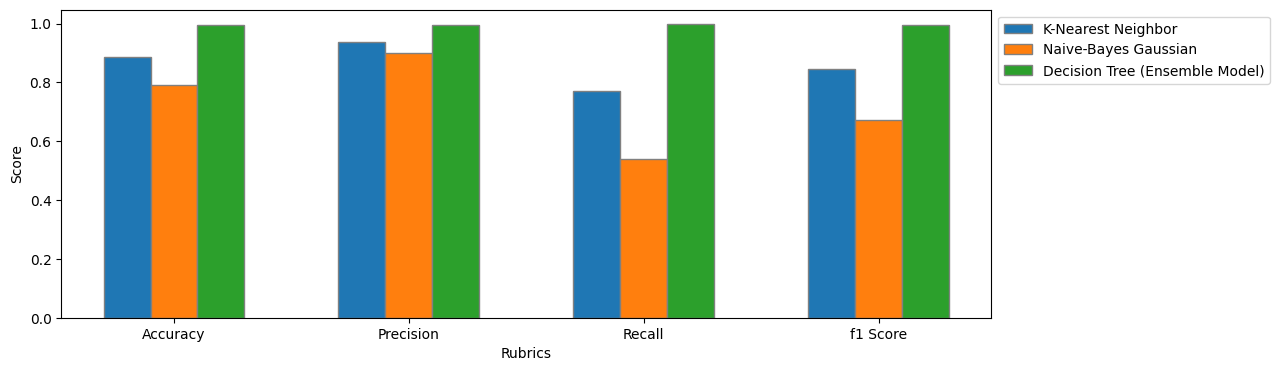

In [166]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_curve,precision_recall_curve


print("AcCURACY")
print(accuracy_score(y_val,output_kn), "K-nearest")
print(accuracy_score(y_val,output_bn), "Naive_Bayes")
print(accuracy_score(y_val,dt_output), "Decision Tree")

print("\nPRECISION")
print(precision_score(y_val,output_kn), "K-nearest")
print(precision_score(y_val,output_bn), "Naive_Bayes")
print(precision_score(y_val,dt_output), "Decision Tree")

print("\nRECALL")
print(recall_score(y_val,output_kn), "K-nearest")
print(recall_score(y_val,output_bn), "Naive_Bayes")
print(recall_score(y_val,dt_output), "Decision Tree")

print("\nAcCURACY Matrix")
print(confusion_matrix(y_val,output_kn))
print("\nPRECISION Matrix" )
print(confusion_matrix(y_val,output_bn))
print("\nRECALL Matrix")
print(confusion_matrix(y_val,dt_output))

print("\nF1 Score")
print(f1_score(y_val,output_kn))
print(f1_score(y_val,output_bn))
print(f1_score(y_val,dt_output))

barWidth = .2
fig = plt.subplots(figsize =(12, 4))
 
# set height of bar
KN = [accuracy_score(y_val,output_kn), precision_score(y_val,output_kn), recall_score(y_val,output_kn), f1_score(y_val,output_kn)]
NB = [accuracy_score(y_val,output_bn), precision_score(y_val,output_bn), recall_score(y_val,output_bn), f1_score(y_val,output_bn)]
DT = [accuracy_score(y_val,dt_output), precision_score(y_val,dt_output), recall_score(y_val,dt_output), f1_score(y_val,dt_output)]
 
# Set position of bar on X axis
br1 = np.arange(len(KN))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, KN, width = barWidth,
        edgecolor ='grey', label ='K-Nearest Neighbor')
plt.bar(br2, NB, width = barWidth,
        edgecolor ='grey', label ='Naive-Bayes Gaussian')
plt.bar(br3, DT,width = barWidth,
        edgecolor ='grey', label ='Decision Tree (Ensemble Model)')
 
# Adding Xticks
plt.xlabel('Rubrics')
plt.ylabel('Score')
plt.xticks([r + barWidth for r in range(len(KN))],
        ['Accuracy', 'Precision', 'Recall', 'f1 Score'])
 
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()


C:\Users\LeRenard\anaconda3\envs\learning_3.7\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\LeRenard\anaconda3\envs\learning_3.7\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- bn
Feature names seen at fit time, yet now missing:
- nb

  warnings.warn(message, FutureWarning)
C:\Users\LeRenard\anaconda3\envs\learning_3.7\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\LeRenard\anaconda3\envs\learning_3.7\

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.25')

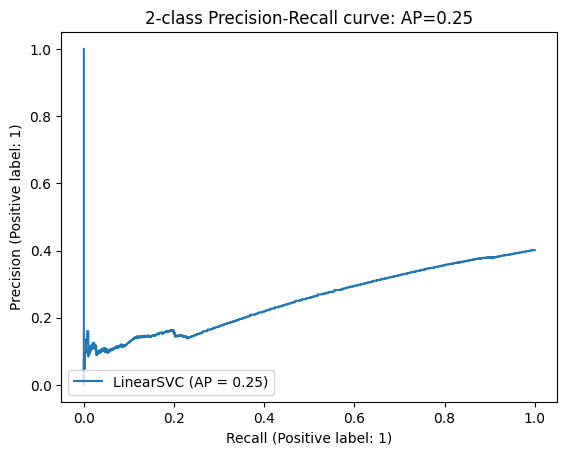

In [102]:
#precision-recall curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn import svm
from sklearn.metrics import average_precision_score

random_state = np.random.RandomState(0)

classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_val)

average_precision = average_precision_score(y_val, y_score)


disp = plot_precision_recall_curve(classifier, X_val, y_val)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))


### Predict the final values on the test dataset.

### the test dataset is indexed starting at 8500

In [103]:
d = pd.read_csv("a_cleaned.csv")
d = d[cols][8500:]
d

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
8500,1.237650e+18,200.373140,67.036524,19.31260,18.39455,18.18594,18.11289,18.12921,1412,301,4,209,2.769820e+18,-0.000283,2460,54616,390
8501,1.237650e+18,200.487808,67.011109,19.27921,17.93257,17.41072,17.21489,17.11903,1412,301,4,209,2.752930e+18,-0.000195,2445,54573,388
8502,1.237650e+18,200.662471,67.078733,19.44622,17.68547,16.72413,16.28330,15.95671,1412,301,4,209,5.585860e+17,0.125980,496,51988,507
8503,1.237650e+18,200.685355,67.100910,19.37913,17.26275,16.21280,15.78933,15.42636,1412,301,4,209,5.585880e+17,0.125183,496,51988,515
8504,1.237650e+18,200.726015,66.978680,16.13412,14.65729,14.14972,13.98663,13.93591,1412,301,4,210,2.752940e+18,0.000134,2445,54573,431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0.014019,447,51877,229


In [105]:
knn_test = kn_.predict(d)
nb_test = nb.predict(d)

d["kn"] = knn_test
d["nb" ] = nb_test

In [106]:
d

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,kn,nb
8500,1.237650e+18,200.373140,67.036524,19.31260,18.39455,18.18594,18.11289,18.12921,1412,301,4,209,2.769820e+18,-0.000283,2460,54616,390,1,0
8501,1.237650e+18,200.487808,67.011109,19.27921,17.93257,17.41072,17.21489,17.11903,1412,301,4,209,2.752930e+18,-0.000195,2445,54573,388,1,0
8502,1.237650e+18,200.662471,67.078733,19.44622,17.68547,16.72413,16.28330,15.95671,1412,301,4,209,5.585860e+17,0.125980,496,51988,507,0,0
8503,1.237650e+18,200.685355,67.100910,19.37913,17.26275,16.21280,15.78933,15.42636,1412,301,4,209,5.585880e+17,0.125183,496,51988,515,0,0
8504,1.237650e+18,200.726015,66.978680,16.13412,14.65729,14.14972,13.98663,13.93591,1412,301,4,210,2.752940e+18,0.000134,2445,54573,431,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0.027583,447,51877,246,0,0
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0.117772,447,51877,228,0,0
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,-0.000402,7303,57013,622,1,1
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0.014019,447,51877,229,0,0


In [107]:


dt_test = dt.predict(d)

In [134]:
df = pd.read_csv("a_cleaned.csv")
preds = pd.DataFrame()


preds["True Value"] = df["star"][8500:]
preds["Decision Tree Ensemble"] = dt_test
preds["K-Nearest"] = knn_test 
preds["Naive_Bayes"] = nb_test

preds


,True Value,Decision Tree Ensemble,K-Nearest,Naive_Bayes
8500,1,1,1,0
8501,1,1,1,0
8502,0,0,0,0
8503,0,0,0,0
8504,1,1,1,0
...,...,...,...,...
9995,0,0,0,0
9996,0,0,0,0
9997,1,1,1,1
9998,0,0,0,0


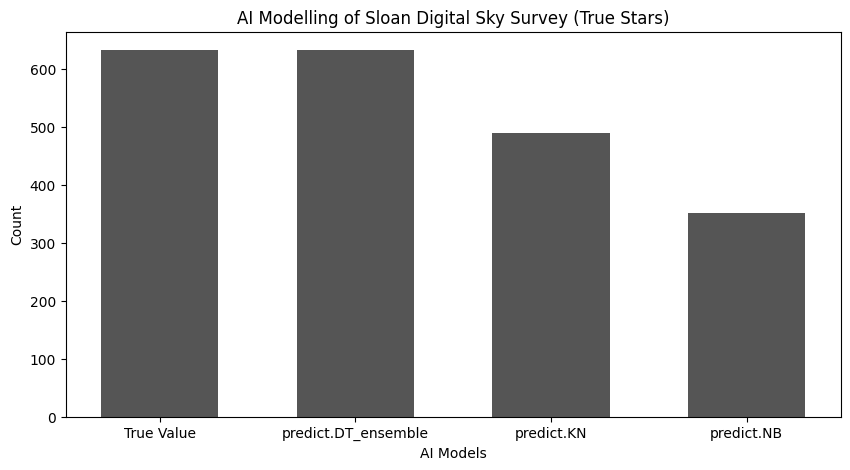

In [164]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
true_val = preds["True Value"].sum()
DT = preds["Decision Tree Ensemble"].sum()
KN = preds["K-Nearest"].sum()
NB = preds["Naive_Bayes"].sum()

plt.bar(["True Value","predict.DT_ensemble","predict.KN","predict.NB"], [true_val,DT,KN,NB], width = 0.6,color="#555555")
plt.xlabel("AI Models")
plt.ylabel("Count")
plt.title("AI Modelling of Sloan Digital Sky Survey (True Stars)")
plt.show()

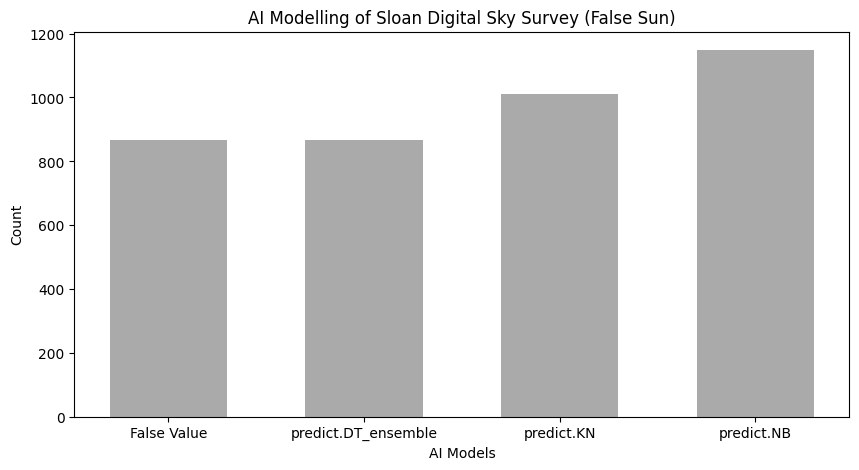

In [136]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
true_val = data_len - preds["True Value"].sum()
DT = data_len - preds["Decision Tree Ensemble"].sum()
KN = data_len - preds["K-Nearest"].sum()
NB = data_len - preds["Naive_Bayes"].sum()

plt.bar(["False Value","predict.DT_ensemble","predict.KN","predict.NB"], [true_val,DT,KN,NB], width = 0.6,color="#aaaaaa")
plt.xlabel("AI Models")
plt.ylabel("Count")
plt.title("AI Modelling of Sloan Digital Sky Survey (False Sun)")
plt.show()